In [1]:
#Basic Library
import pandas as pd
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import warnings

import folium
from IPython.display import HTML
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot

In [6]:
df=pd.read_csv("onlinedeliverydata (1).csv")

In [7]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


We can understand here more categorical variables and very less continuous variables

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [9]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


we have a 388 respondents in the dataset

Age between 18-33 with an average of 25

Total family size of  the records between 1-6 and average of 3



In [10]:
df.isnull().sum()


Age                                          0
Gender                                       0
Marital Status                               0
Occupation                                   0
Monthly Income                               0
Educational Qualifications                   0
Family size                                  0
latitude                                     0
longitude                                    0
Pin code                                     0
Medium (P1)                                  0
Medium (P2)                                  0
Meal(P1)                                     0
Meal(P2)                                     0
Perference(P1)                               0
Perference(P2)                               0
Ease and convenient                          0
Time saving                                  0
More restaurant choices                      0
Easy Payment option                          0
More Offers and Discount                     0
Good Food qua

In [11]:
df.shape

(388, 55)

In [12]:
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [ ]:
df["Monthly Income"].value_counts()

No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: Monthly Income, dtype: int64

In [13]:
for i in range(388):
    if df["Monthly Income"].values[i] == "No Income":
        df["Monthly Income"].values[i] = 0
    elif df["Monthly Income"].values[i] == "Below Rs.10000":
        df["Monthly Income"].values[i] = 5000
    elif df["Monthly Income"].values[i] == "10001 to 25000":
        df["Monthly Income"].values[i] = 15000
    elif df["Monthly Income"].values[i] == "25001 to 50000":
        df["Monthly Income"].values[i] = 30000
    elif df["Monthly Income"].values[i] == "More than 50000":
        df["Monthly Income"].values[i] = 60000        
df.head(11)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,5000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,5000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,5000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL
5,27,Female,Married,Employee,60000,Post Graduate,2,12.9299,77.6848,560103,Food delivery apps,Walk-in,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Ag

In [14]:
df["Gender"].value_counts()

Male      222
Female    166
Name: Gender, dtype: int64

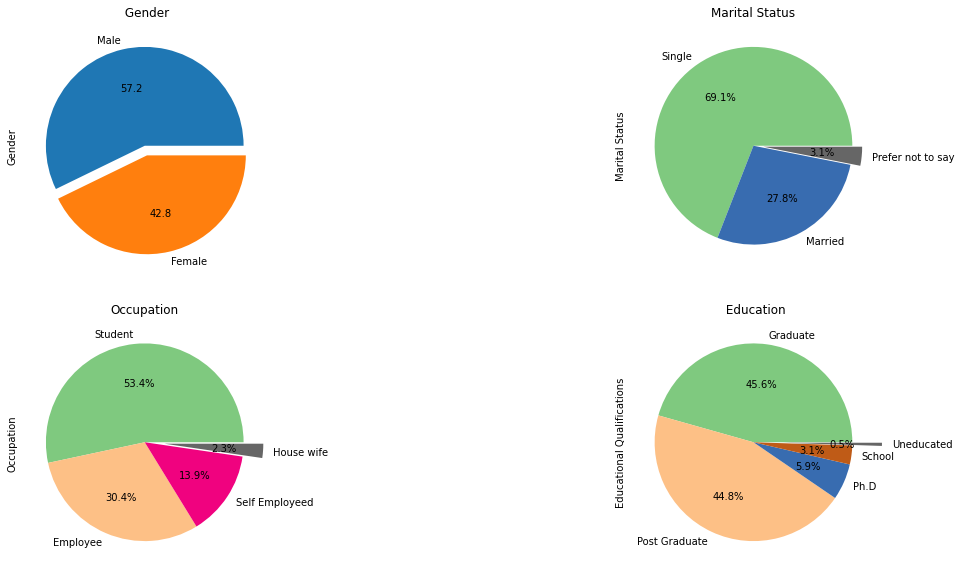

In [15]:
#
#Categorical Variables
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts().plot.pie(title=' Gender',figsize=(20,10),autopct="%1.1f",explode=[0,.1])
plt.subplot(222)
df['Marital Status'].value_counts().plot.pie(title='Marital Status',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0.1])
plt.subplot(223)
df['Occupation'].value_counts().plot.pie(title='Occupation',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0.2])
plt.subplot(224)
df['Educational Qualifications'].value_counts().plot.pie(title=' Education',cmap="Accent",autopct="%1.1f%%",explode=[0,0,0,0,0.3])


A) 57% of the respndents are the male and 43% are female. 

B) Respondents' education was highest in that  young graduates (46%)  and graduate students (44%), includes doctoral students, school children, and uneducated people.

C)Respondents' marriage status was high from singles (69%)

D)The occupation of respondents where highly from the student (54%)

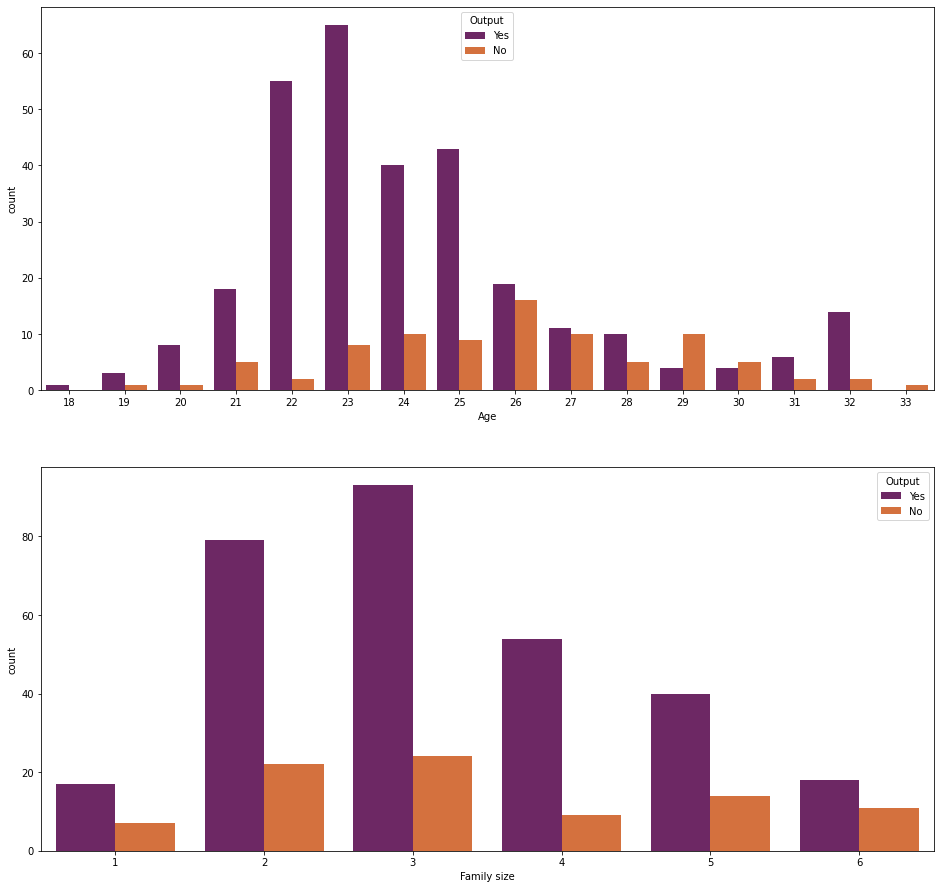

In [16]:
#Data Visualization

%matplotlib inline

_ = [0, 6]
_ = list(enumerate([list(df.columns)[i] for i in _], start=1))

fig = plt.figure(figsize=[16,24])
for index, col_name in _:
    ax = fig.add_subplot(3, 1, index)    
    sns.countplot(x=col_name, data=df, hue='Output', palette='inferno')

You can also see that the reorganization is taking place in the age group under 25 and families under 4 years. Occurs more frequently

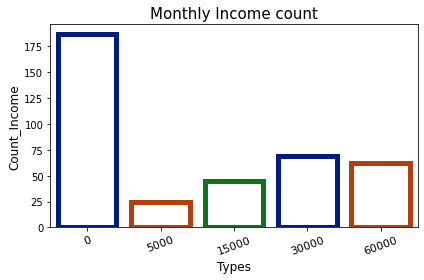

In [17]:
#Income Countplot
plt.subplot(1,1,1)
ax = sns.countplot(x="Monthly Income", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Monthly Income count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Income', fontsize = 12)
plt.tight_layout()

Most of the respondents  are students they don't have a stable income, so they fall into the non-income category that supports age variables. The next highest income group was between Rs 25001 and Rs 50,000, which was the nominal salary  new entrants to the corporate industry. In terms of profession, the data shows more student respondents supporting previous analyzes, followed by employee respondents. The data also includes self-employed and housewife respondents. Most of the respondents have bachelor's degree, and the number of married people is very lower.

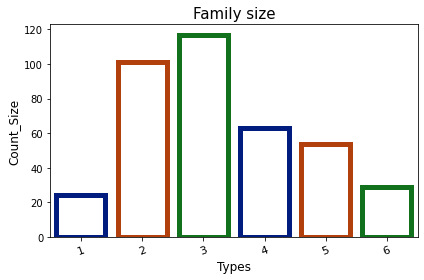

In [18]:
#Family Size Countplot
plt.subplot(1,1,1)
ax = sns.countplot(x="Family size", data=df,
                   facecolor=(0, 0, 0, 0),
                   linewidth=5,
                   edgecolor=sns.color_palette("dark", 3))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Family size',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Size', fontsize = 12)
plt.tight_layout()

A family distribution where the majority of the recorded family size (the number of people living with you) is three, followed by the second food in their room.

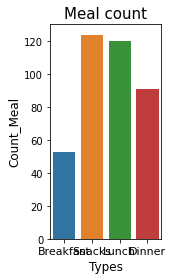

In [19]:
#Meal Countplot
plt.subplot(1,3,1)
ax = sns.countplot(x="Meal(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Meal count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count_Meal', fontsize = 12)
plt.tight_layout()

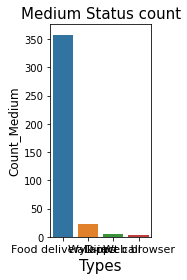

In [20]:
#Medium Countplot
plt.subplot(1,3,2)
ax = sns.countplot(x="Medium (P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
ax.set_title('Medium Status count',fontsize = 15)
ax.set_xlabel('Types',fontsize = 15) 
ax.set_ylabel('Count_Medium', fontsize = 12)
plt.tight_layout()



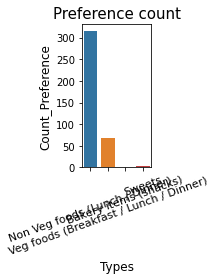

In [21]:
#Preference Countplot
plt.subplot(1,3,3)
ax = sns.countplot(x="Perference(P1)", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=20)
ax.set_title('Preference count',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

You can watch the data of the consumer preferences, meals of the day,  meal types, and media for purchasing food. Most preferences are grocery delivery applications when it comes to shopping media, followed by walking, with few  direct phone or web browser numbers. Non-veg is the most preferred type of food, and also vegetarian foods, followed by minimal sweets and baked goods.

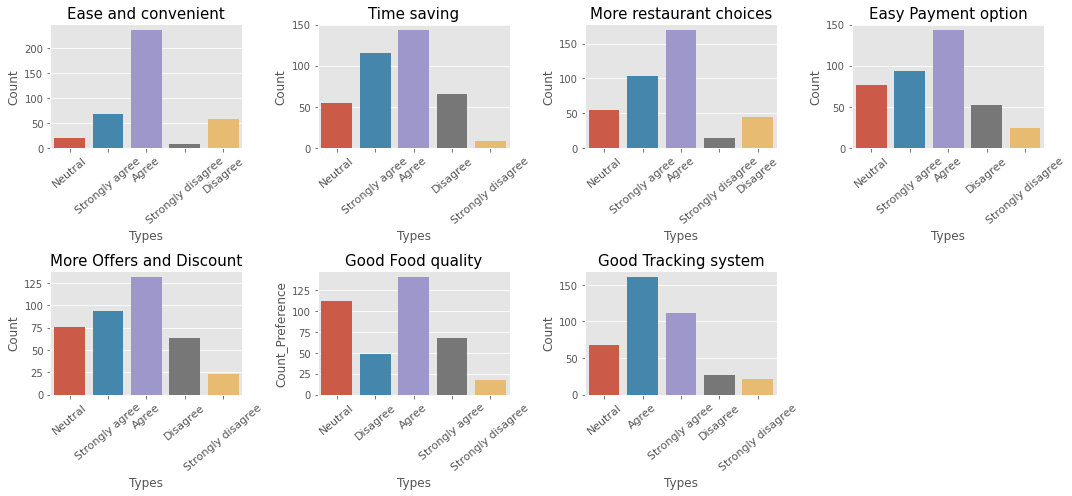

In [22]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')

#Ease and convenient Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Ease and convenient", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Ease and convenient',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Time saving", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Time saving',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Restaurant Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="More restaurant choices", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More restaurant choices',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Payment Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Easy Payment option", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Easy Payment option',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Offers Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="More Offers and Discount", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('More Offers and Discount',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Preference Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Food quality", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Food quality',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()

#Tracking Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Good Tracking system", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Tracking system',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

You can identify the demand factors that goes consumers to buy orders from your application. You can see the simplicity and convenience of ordering using the app is very much in agree with the impact on your order. Around 258 respondents agreed that ordering using the application can save time, so the time-saving thing was also the biggest answer. Respondents agree that they can also place an order based on the restaurant selection specified in the application. Payment also makes an important thing, as 143 respondents agreed to consider this factor in their order inquiries. The majority of  respondents agree that the amount of food they receive also affects in turn, but  nearly 112 respondents  are neutral to this, and tracking systems are viable, if any. For example, he points out that  it is really well designed. Shop through the grocery delivery app.

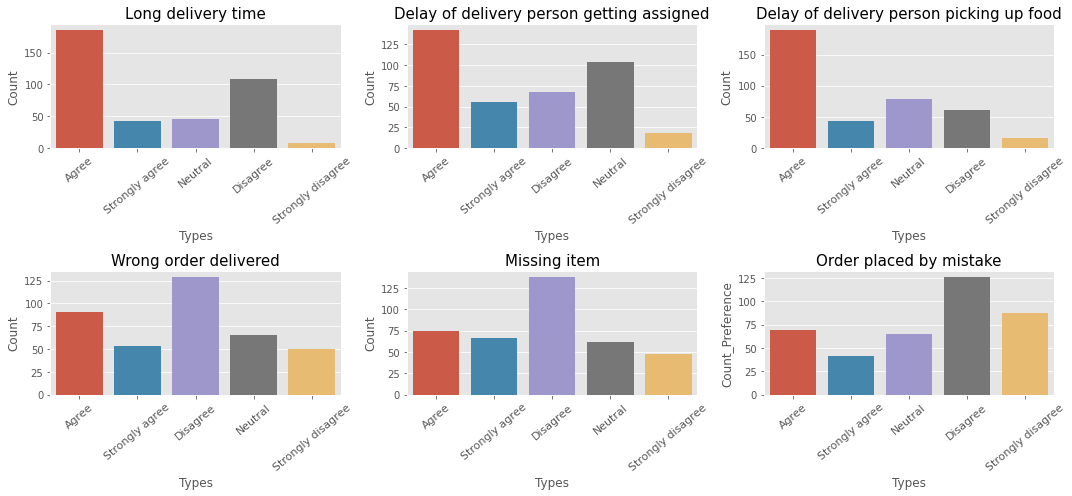

In [23]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('ggplot')
#Long delivery time Countplot
plt.subplot(2,3,1)
ax = sns.countplot(x="Long delivery time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Long delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person getting assigned Countplot
plt.subplot(2,3,2)
ax = sns.countplot(x="Delay of delivery person getting assigned", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person getting assigned',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delay of delivery person picking up food Countplot
plt.subplot(2,3,3)
ax = sns.countplot(x="Delay of delivery person picking up food", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delay of delivery person picking up food',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Wrong order delivered Countplot
plt.subplot(2,3,4)
ax = sns.countplot(x="Wrong order delivered", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Wrong order delivered',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Missing item Countplot
plt.subplot(2,3,5)
ax = sns.countplot(x="Missing item", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Missing item',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order placed by mistake Countplot
plt.subplot(2,3,6)
ax = sns.countplot(x="Order placed by mistake", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order placed by mistake',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count_Preference', fontsize = 12)
plt.tight_layout()



People feel that long  delivery times have a high impact on canceling current orders. You also agree that delays in the allocation of delivery personnel and delays in the collection of food will be added to  the decision to cancel the order. The majority of respondents, on the other hand, recognize the problem as soon as the order is delivered and cannot cancel it at that point, so they do not cancel the order because they delivered the missing or incorrect item.


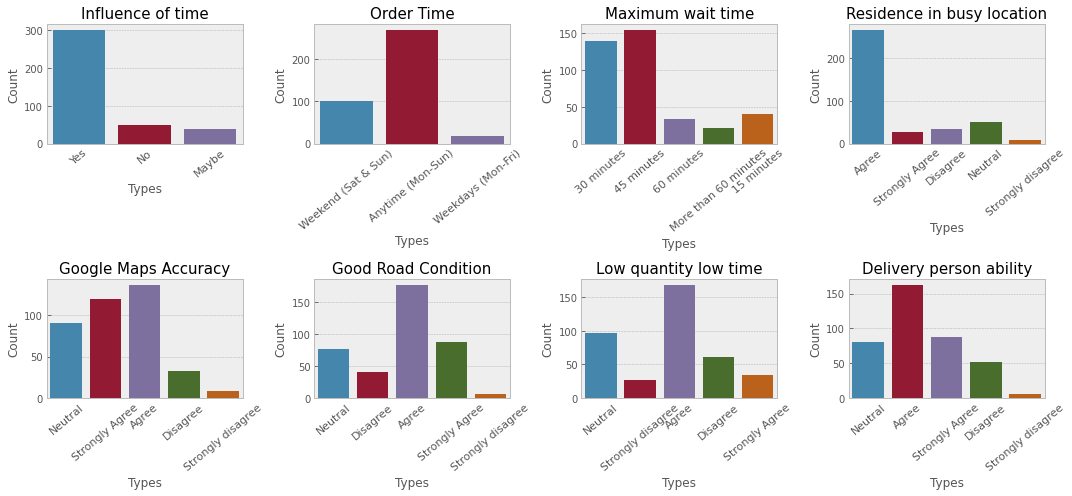

In [24]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of time Countplot
plt.subplot(2,4,1)
ax = sns.countplot(x="Influence of time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Order Time Countplot
plt.subplot(2,4,2)
ax = sns.countplot(x="Order Time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Order Time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Maximum wait time Countplot
plt.subplot(2,4,3)
ax = sns.countplot(x="Maximum wait time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Maximum wait time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Hygiene Countplot
plt.subplot(2,4,4)
ax = sns.countplot(x="Residence in busy location", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Residence in busy location',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Accuracy Countplot
plt.subplot(2,4,5)
ax = sns.countplot(x="Google Maps Accuracy", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Google Maps Accuracy',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()
#Good Road Condition Countplot
plt.subplot(2,4,6)
ax = sns.countplot(x="Good Road Condition", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Road Condition',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Low quantity low time Countplot
plt.subplot(2,4,7)
ax = sns.countplot(x="Low quantity low time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Low quantity low time',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Delivery person ability Countplot
plt.subplot(2,4,8)
ax = sns.countplot(x="Delivery person ability", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Delivery person ability',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

The majority of respondents agree that their order affects the time of the entire process. Nearly 269 respondents said they placed orders anytime on weekdays and  the next highest orders on weekends and weekdays. Respondents also say's that the majority had a maximum waiting time of 45 minutes, with 30 and 60 minutes being accurate before receiving an order thereafter. Nearly 169 people feel that if they order a small amount, the cooking time will be short and the order will arrive sooner. Many Bangalore residents now feel that  the road conditions are good. The majority also believe that it is up to the courier to find the location and deliver the order as soon as possible.

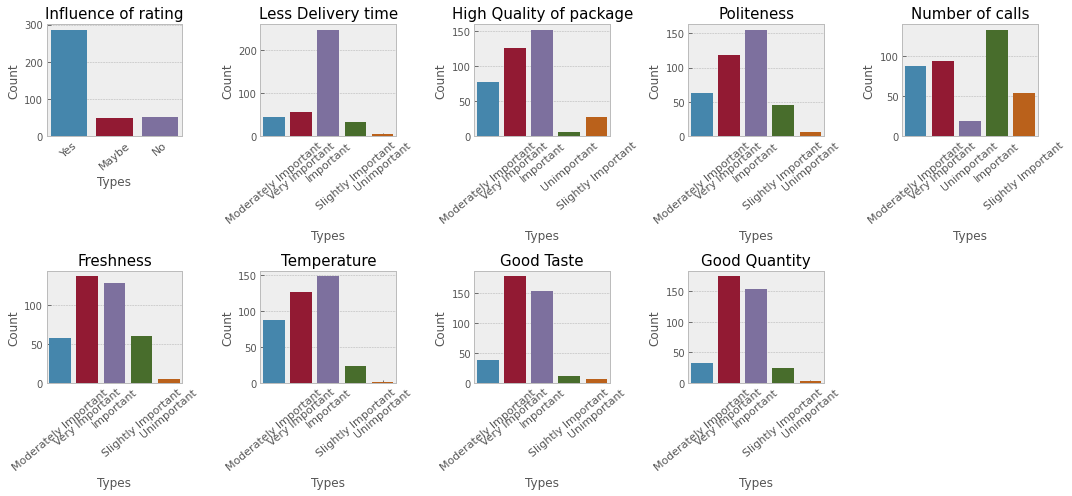

In [25]:
#Setting up the frame
plt.figure(figsize = (15, 7))
plt.style.use('bmh')

#Influence of rating Countplot
plt.subplot(2,5,1)
ax = sns.countplot(x="Influence of rating", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Influence of rating',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Less Delivery time Countplot
plt.subplot(2,5,2)
ax = sns.countplot(x="Less Delivery time", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Less Delivery time',fontsize = 15)
ax.set_xlabel('Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#High Quality of package Countplot
plt.subplot(2,5,3)
ax = sns.countplot(x="High Quality of package", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('High Quality of package',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Politeness Countplot
plt.subplot(2,5,4)
ax = sns.countplot(x="Politeness", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Politeness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()


#Number of calls Countplot
plt.subplot(2,5,5)
ax = sns.countplot(x="Number of calls", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Number of calls',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Freshness Countplot
plt.subplot(2,5,6)
ax = sns.countplot(x="Freshness ", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Freshness',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Temperature Countplot
plt.subplot(2,5,7)
ax = sns.countplot(x="Temperature", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Temperature',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Taste Contplot
plt.subplot(2,5,8)
ax = sns.countplot(x="Good Taste ", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Taste',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()

#Good Quantity Countplot
plt.subplot(2,5,9)
ax = sns.countplot(x="Good Quantity", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11,rotation=40)
ax.set_title('Good Quantity',fontsize = 15)
ax.set_xlabel( 'Types',fontsize = 12) 
ax.set_ylabel('Count', fontsize = 12)
plt.tight_layout()


Nearly 286 respondents  agreed  that the majority of  people thinks package quality to be important in  delivery. Shortening the  delivery time is also an important factor in the evaluation. When it comes to courier, the  majority of respondents thinks the number of calls  and politeness to be important factors. Delivery personnel usually call more often if there is a problem and are not polite if they find the delivery process difficult, which reflects their assessment. The majority of them are positive and consider all  factors to be important in assessing a restaurant.Looking at each photo, we can see that the majority of  people consider freshness to be a very important factor when it comes to rating. They also consider temperature to be an important factor, but not so important because customers can understand that the food is  delivered in the same period. Many consumers consider good quantity and  taste to be very vital factors.

In [26]:
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,0,Post Graduate,4,12.9766,77.5993,560001,Food delivery apps,Web browser,Breakfast,Lunch,Non Veg foods (Lunch / Dinner),Bakery items (snacks),Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Neutral,Neutral,Neutral,Neutral,Yes,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,5000,Graduate,3,12.9770,77.5773,560009,Food delivery apps,Web browser,Snacks,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Yes,Anytime (Mon-Sun),30 minutes,Strongly Agree,Neutral,Disagree,Strongly disagree,Agree,Yes,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,5000,Post Graduate,3,12.9551,77.6593,560017,Food delivery apps,Direct call,Lunch,Snacks,Non Veg foods (Lunch / Dinner),Ice cream / Cool drinks,Strongly agree,Strongly agree,Strongly agree,Neutral,Neutral,Disagree,Neutral,Disagree,Neutral,Neutral,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Strongly agree,Agree,Neutral,Yes,Anytime (Mon-Sun),45 minutes,Agree,Strongly Agree,Neutral,Neutral,Agree,Yes,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,0,Graduate,6,12.9473,77.5616,560019,Food delivery apps,Walk-in,Snacks,Dinner,Veg foods (Breakfast / Lunch / Dinner),Bakery items (snacks),Agree,Agree,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Strongly agree,Neutral,Agree,Disagree,Disagree,Neutral,Agree,Agree,Agree,Disagree,Disagree,Neutral,Yes,Anytime (Mon-Sun),30 minutes,Disagree,Agree,Agree,Neutral,Agree,Yes,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,5000,Post Graduate,4,12.9850,77.5533,560010,Walk-in,Direct call,Lunch,Dinner,Non Veg foods (Lunch / Dinner),Veg foods (Breakfast / Lunch / Dinner),Agree,Agree,Agree,Agree,Agree,Neutral,Neutral,Agree,Strongly agree,Strongly agree,Agree,Strongly agree,Agree,Disagree,Strongly agree,Strongly agree,Neutral,Neutral,Neutral,Disagree,Yes,Weekend (Sat & Sun),30 minutes,Agree,Agree,Agree,Agree,Agree,Yes,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [27]:
pip install datacleaner

  Created wheel for datacleaner: filename=datacleaner-0.1.5-py3-none-any.whl size=7424 sha256=dbb70356393019f9ba7a1871ca769e61019f2aa086322464bf5145161f4eba0c
  Stored in directory: /root/.cache/pip/wheels/26/8c/85/222a1180e47515576715bcfb1733746bf85c91f27adbeffae7
Successfully built datacleaner


In [28]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

In [29]:
dc.autoclean(df).head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Medium (P1),Medium (P2),Meal(P1),Meal(P2),Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,0,2,4,12.9766,77.5993,560001,1,2,0,1,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,2,2,1,0,2,2,2,2,2,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,5000,0,3,12.9770,77.5773,560009,1,2,3,0,1,3,3,3,3,3,3,2,0,3,3,0,3,3,3,3,3,3,3,3,3,3,2,0,1,3,2,1,4,0,2,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,5000,2,3,12.9551,77.6593,560017,1,0,2,2,1,1,3,3,3,2,2,1,2,1,2,2,0,0,0,0,0,0,0,3,0,2,2,0,2,0,3,2,2,0,2,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,0,0,6,12.9473,77.5616,560019,1,1,3,0,3,0,0,0,3,0,3,0,0,0,3,2,0,1,1,2,0,0,0,1,1,2,2,0,1,1,0,0,2,0,2,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,5000,2,4,12.9850,77.5533,560010,2,0,2,0,1,3,0,0,0,0,0,2,2,0,3,3,0,3,0,1,3,3,2,2,2,1,2,2,1,0,0,0,0,0,2,0,0,1,0,0,0,4,4,1,129


In [30]:
df.shape

(388, 55)

In [31]:
df.drop(['latitude', 'longitude', 'Pin code','Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)'], axis=1, inplace=True)

In [32]:
X = df.drop('Output', axis=1) # input categorical features
y = df.Output 

In [33]:
X.shape, df.shape

((388, 47), (388, 48))

In [34]:
X.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,Perference(P1),Perference(P2),Ease and convenient,Time saving,More restaurant choices,Easy Payment option,More Offers and Discount,Good Food quality,Good Tracking system,Self Cooking,Health Concern,Late Delivery,Poor Hygiene,Bad past experience,Unavailability,Unaffordable,Long delivery time,Delay of delivery person getting assigned,Delay of delivery person picking up food,Wrong order delivered,Missing item,Order placed by mistake,Influence of time,Order Time,Maximum wait time,Residence in busy location,Google Maps Accuracy,Good Road Condition,Low quantity low time,Delivery person ability,Influence of rating,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Reviews
0,20,0,2,3,0,2,4,1,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,2,2,1,0,2,2,2,2,2,1,1,1,1,1,1,1,1,136
1,24,0,2,3,5000,0,3,1,3,3,3,3,3,3,2,0,3,3,0,3,3,3,3,3,3,3,3,3,3,2,0,1,3,2,1,4,0,2,4,4,4,4,4,4,4,4,135
2,22,1,2,3,5000,2,3,1,1,3,3,3,2,2,1,2,1,2,2,0,0,0,0,0,0,0,3,0,2,2,0,2,0,3,2,2,0,2,0,4,1,4,4,0,4,1,119
3,22,0,2,3,0,0,6,3,0,0,0,3,0,3,0,0,0,3,2,0,1,1,2,0,0,0,1,1,2,2,0,1,1,0,0,2,0,2,4,0,1,4,4,4,4,0,176
4,22,1,2,3,5000,2,4,1,3,0,0,0,0,0,2,2,0,3,3,0,3,0,1,3,3,2,2,2,1,2,2,1,0,0,0,0,0,2,0,0,1,0,0,0,4,4,129


In [35]:
# Train Test Split 
df_train = df.copy()
df_train.shape
train = df_train.drop(["Output"],axis=1)
train_ = df_train["Output"]

X_train = train.values
y_train = train_.values

In [36]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [37]:
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate
train_x, test_x,train_y,test_y = train_test_split(X_train,y_train,test_size  = 0.2, random_state=0)
print("Train dataset shape: {0}, \nTest dataset shape: {1}".format(train_x.shape, test_x.shape))

Train dataset shape: (310, 47), 
Test dataset shape: (78, 47)


In [38]:
#library import for model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score

In [39]:
# Logistic Regression

logistic = LogisticRegression(max_iter=10000)
#fitting the values for x and y
logistic.fit(train_x,train_y)

#predictions from test data
prediction = logistic.predict(test_x)	
#print(prediction)

#calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print("Accuracy Score Logistic Regresion  :",accuracy_score)

Accuracy Score Logistic Regresion  : 0.8333333333333334


So our predictions are almost 83% accurate, i.e. we have identified 83% of the output correctly for our logistic regression model.

Text(95.18, 0.5, 'Predicted')

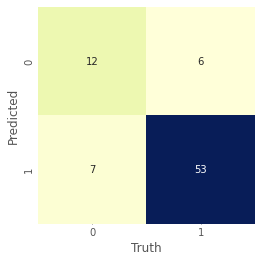

In [40]:
###### confusion matrix  starts ######
from sklearn.metrics import accuracy_score, confusion_matrix
cm_lgr1 = confusion_matrix(test_y,prediction) 
names = np.unique(prediction)
sns.heatmap(cm_lgr1, square=True, annot=True, cbar=False,xticklabels=names, yticklabels=names, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Truth')
plt.ylabel('Predicted')

Total 6 misclassified out of 78 test values.

In [41]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1)
tree_model.fit(train_x,train_y)
pred_cv_tree=tree_model.predict(test_x)
score_tree =accuracy_score(pred_cv_tree,test_y)*100 
score_tree

75.64102564102564

our predictions are almost 75.6% accurate, i.e. we have identified 75.6% of the Output status correctly for our Decision tree model

In [42]:
#random forest 
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=1,max_depth=10,n_estimators=50)
forest_model.fit(train_x,train_y)
pred_cv_forest=forest_model.predict(test_x)
score_forest = accuracy_score(pred_cv_forest,test_y)*100
score_forest

89.74358974358975

our predictions are almost 89.7% accurate, i.e. we have identified 89.7% of the Output status correctly for our Random Forest model.

In [44]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model =  KNeighborsClassifier(n_neighbors=3)
knn_model.fit(train_x,train_y)
pred_cv_knn=knn_model.predict(test_x)
score_knn = accuracy_score(pred_cv_knn,test_y)*100
score_knn

83.33333333333334

our predictions are almost 83.3% accurate, i.e. we have identified 83.3% of the Output status correctly for our KNeighbors Classifier.

In [45]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(train_x,train_y)
pred_cv_gnb=knn_model.predict(test_x)
score_gnb = accuracy_score(pred_cv_gnb,test_y)*100
score_gnb

83.33333333333334

our predictions are almost 83.3% accurate, i.e. we have identified 83.3% of the Output status correctly for our Naive Bayes.

Logistic Regression model gives : 83.3% prediction accuracy

Decision Tree model gives : 75.6% prediction accuracy

Random Forest model gives : 89.7% prediction accuracy

kNNClassifier model gives : 83.3% prediction accuracy

Naive Bayes Classifier model gives : 83.3% prediction accuracy

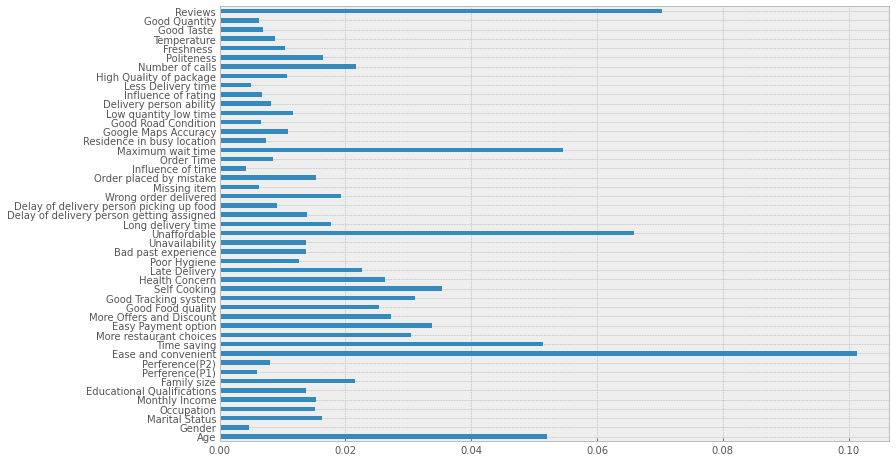

In [46]:
importances = pd.Series(forest_model.feature_importances_,index=X.columns)
importances.plot(kind='barh', figsize=(12,8))

we can find out that ease and conventient and Review feature are most important. So, feature engineering helped us in predicting our target variable.

Conclusion
Conclusion- After testing 6 different algorithms, the best accuracy on the board is achieved by RandomForest (89.7%)followed by Logistic Regression , KNNClassifier model andNaive Bayes Classifie is equal accuracy 83.3% and Decision Tree performed the worst (75.6%).

The orders is heavily dependent on the ease and convenient or reivew for Predictions.

The RandomForest model algorithm gives us the maximum Accuracy (89.7) % compared to the other 3 Machine Learning Classification Algorithms.